In [ ]:
# try applying kmeans twice
# once using colour segmentation approaches to detect most dominant colours on every single image
# gives a much smaller vector - can define length of vector by changing number of clusters in first kmeans
# idea of colour dominancy
# this is new representation of images
# apply kmeans again to this!!! - These are the clusters
# Then perform ClusterMatch!

# for colour segementation:
# kmeans, historgrams, etc - google solutions

# show results from data, improve with more advanced techniques

In [1]:
import numpy as np
import cv2
import tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import cifar10
import umap
%matplotlib inline

2025-03-28 12:09:36.565683: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_aux = x_train[:25000], x_train[25000:]
y_train, y_aux = y_train[:25000], y_train[25000:]

print(f"Shape of training data: X: {x_train.shape}, Y: {y_train.shape}")
print(f"Shape of auxiliary data: X: {x_aux.shape}, y: {y_aux.shape}")

(-0.5, 31.5, 31.5, -0.5)

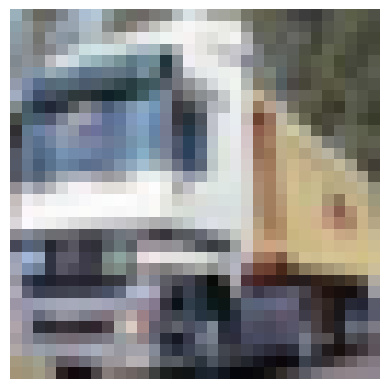

In [ ]:
image = x_train[1]
plt.imshow(image)
plt.axis('off')

Original image shape: (32, 32, 3)
Reshaped image shape: (1024, 3)
Centres: [[ 81.14312  82.35316  86.24164]
 [184.5041  183.5144  179.4465 ]]
Centres: [[ 81  82  86]
 [184 183 179]]
Segmented data: [[184 183 179]
 [184 183 179]
 [ 81  82  86]
 ...
 [184 183 179]
 [184 183 179]
 [184 183 179]]


(-0.5, 31.5, 31.5, -0.5)

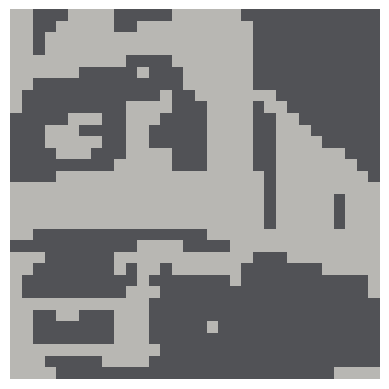

In [ ]:
print(f"Original image shape: {image.shape}")
pixel_values = np.reshape(image, (-1, 3))
pixel_values = np.float32(pixel_values)
print(f"Reshaped image shape: {pixel_values.shape}")

k = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print(f"Centres: {centres}")

centres = np.uint8(centres)
print(f"Centres: {centres}")

labels.flatten()

segmented_data = centres[labels.flatten()]
print(f"Segmented data: {segmented_data}")

segmented_image = segmented_data.reshape(image.shape)
labels_reshape = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(segmented_image)
plt.axis('off')

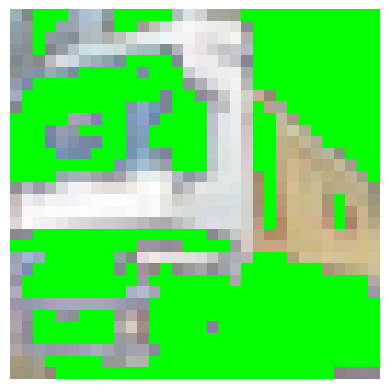

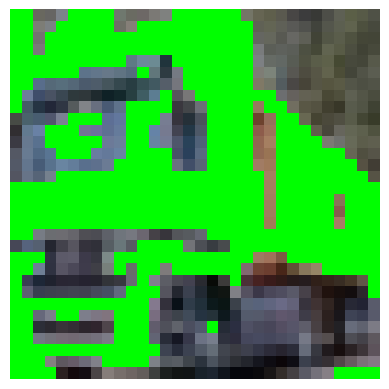

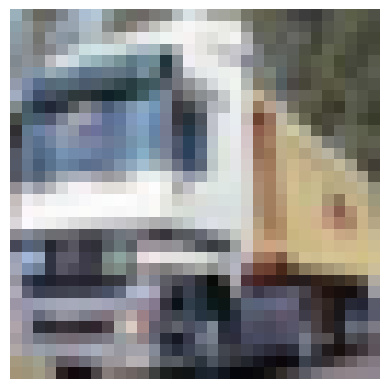

In [ ]:
masked_image = np.copy(image)
cluster = 0
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

masked_image = np.copy(image)
cluster = 1
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

masked_image = np.copy(image)
cluster = 2
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)
plt.axis('off')
plt.show()

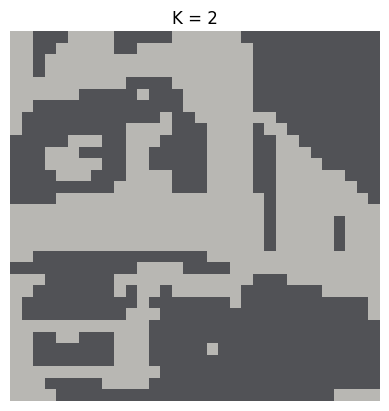

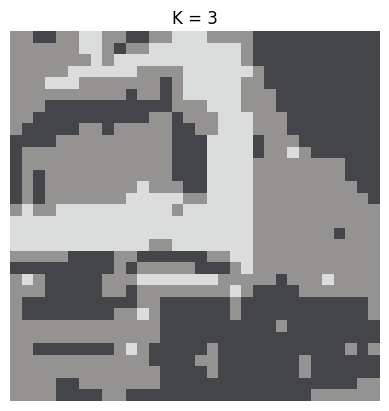

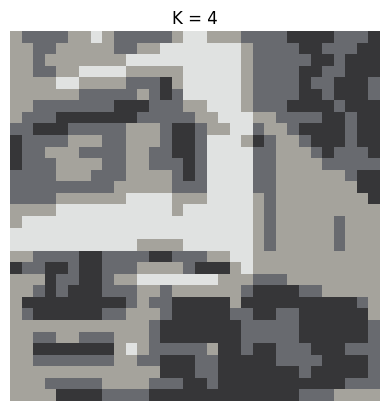

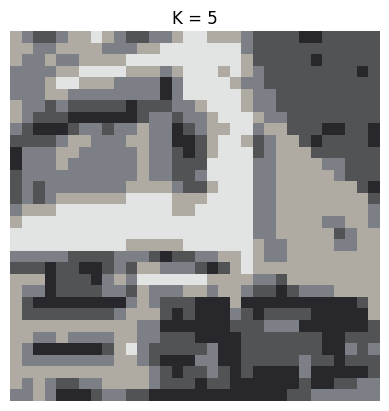

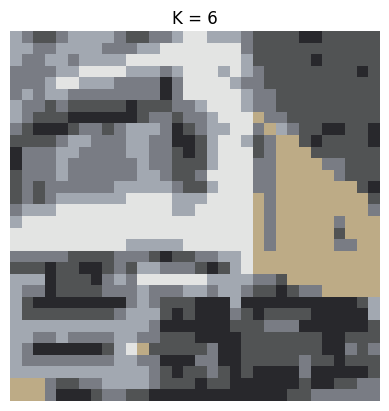

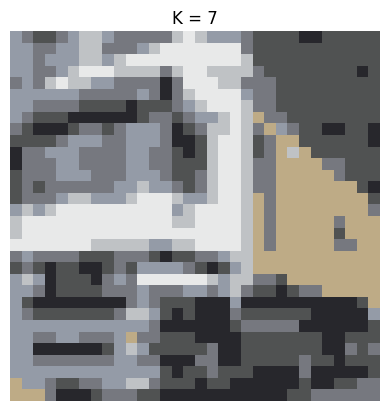

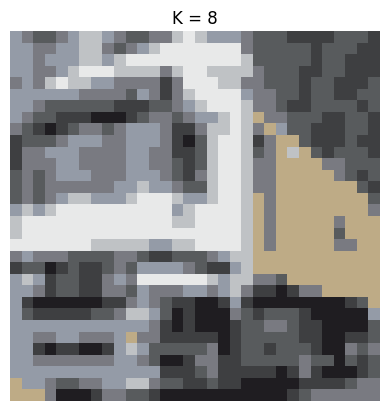

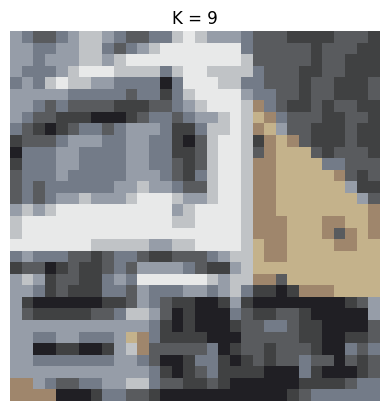

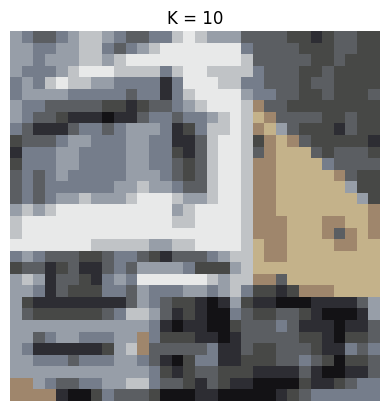

In [ ]:
for k in range(2, 11):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(image.shape)
    labels_reshape = labels.reshape(image.shape[0], image.shape[1])

    plt.imshow(segmented_image)
    plt.title(f"K = {k}")
    plt.axis('off')
    plt.show()

In [ ]:
'''
Next steps:
- Determine optimal k value
- Use KMeans to segment each image in the dataset like this
- Then use KMeans on the dataset as a whole to create the 100 clusters
- Visualise the clusters
- Perform clustermatch attack on the dataset
'''

In [ ]:
segmented_aux_images = []

for img in tqdm.tqdm(x_aux):
    pixel_values = np.reshape(img, (-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(img.shape)
    segmented_aux_images.append(segmented_image)

segmented_aux_images = np.array(segmented_aux_images, dtype=np.uint8)
print(f"Shape of segmented aux images: {segmented_aux_images.shape}")

100%|██████████| 25000/25000 [00:56<00:00, 442.46it/s]


Shape of segmented aux images: (25000, 32, 32, 3)


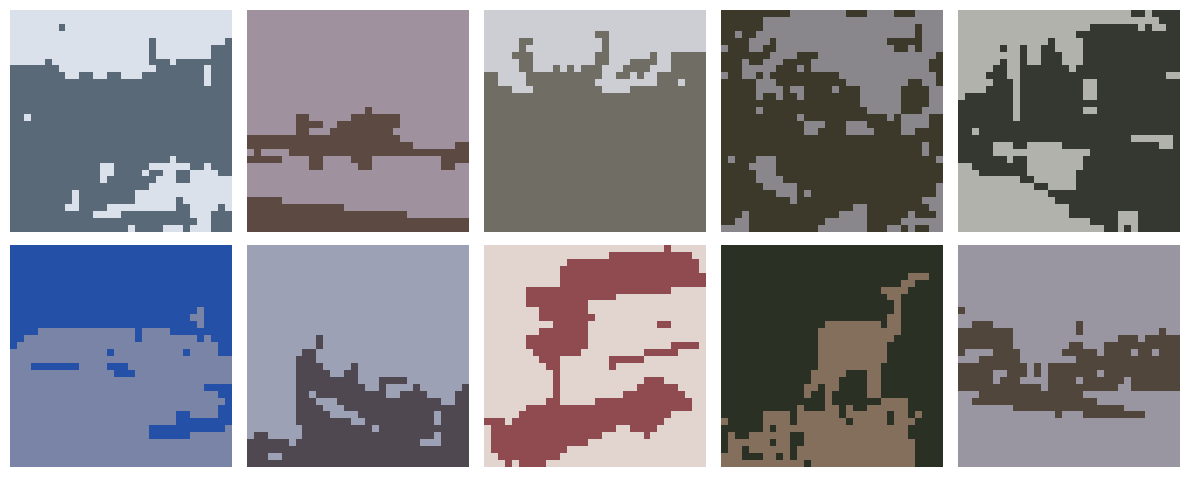

In [ ]:
random_indices = random.sample(range(len(segmented_aux_images)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(segmented_aux_images[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 25000/25000 [05:19<00:00, 78.16it/s] 


Shape of segmented aux images: (25000, 32, 32, 3)


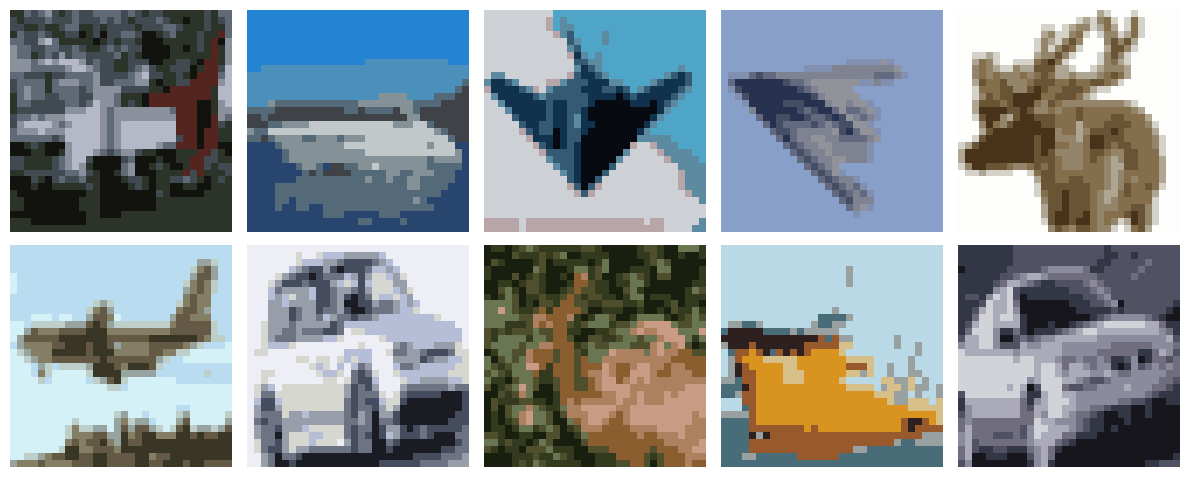

In [ ]:
segmented_aux_images = []
k = 7

for img in tqdm.tqdm(x_aux):
    pixel_values = np.reshape(img, (-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(img.shape)
    segmented_aux_images.append(segmented_image)

segmented_aux_images = np.array(segmented_aux_images, dtype=np.uint8)
print(f"Shape of segmented aux images: {segmented_aux_images.shape}")

random_indices = random.sample(range(len(segmented_aux_images)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(segmented_aux_images[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 25000/25000 [08:11<00:00, 50.87it/s]


Shape of segmented aux images: (25000, 32, 32, 3)


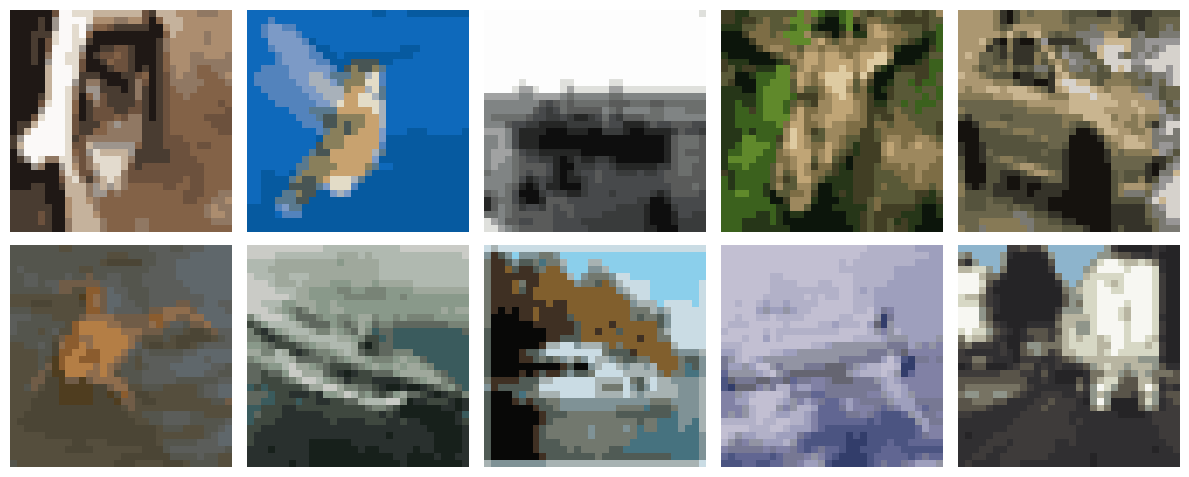

In [ ]:
segmented_aux_images = []
k = 10

for img in tqdm.tqdm(x_aux):
    pixel_values = np.reshape(img, (-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centres = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centres = np.uint8(centres)
    segmented_data = centres[labels.flatten()]
    segmented_image = segmented_data.reshape(img.shape)
    segmented_aux_images.append(segmented_image)

segmented_aux_images = np.array(segmented_aux_images, dtype=np.uint8)
print(f"Shape of segmented aux images: {segmented_aux_images.shape}")

random_indices = random.sample(range(len(segmented_aux_images)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(segmented_aux_images[idx])
    ax.axis('off')

plt.tight_layout()
plt.show()

Shape of aux data image: (32, 32, 3)


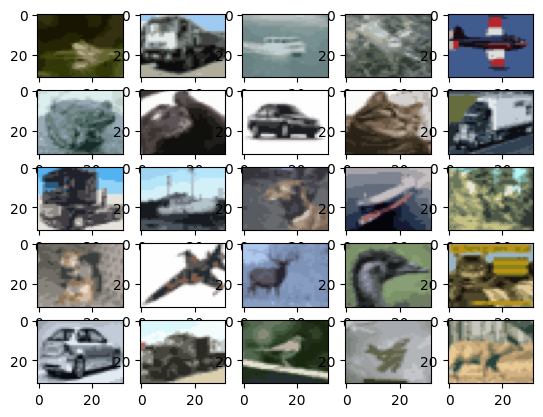

Shape of aux data: (25000, 3072)
Shape of aux y data: (25000,)


In [ ]:
print(f"Shape of aux data image: {segmented_aux_images[0].shape}")
x_aux = segmented_aux_images / 255.0
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_aux[k], aspect='auto') 
        k += 1
plt.show()
x_aux = x_aux.reshape(25000, -1)
y_aux = y_aux.flatten()
print(f"Shape of aux data: {x_aux.shape}")
print(f"Shape of aux y data: {y_aux.shape}")

'''
Try without reshaping data too?
'''

In [ ]:
poison_rates = [0.5, 1, 2]

np.random.seed(42)

kmeans = KMeans(n_clusters=100) # euclidian distance
kmeans.fit(x_aux)

# train_km = kmeans.predict(x_train)
# test_km = kmeans.predict(x_test)

cluster_indices, cluster_counts = np.unique(kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')
print(f'Cluster indices: {cluster_indices}')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [201 210 388 438 210 342 131 171 357 120 218 297 193 215 563 131 183 207
 209 237 192 510 200 238 276 130 353 325 268 168 117 147 295 302 148 314
 241  81 268 240 236 287 548 233 191 296 122 248  94 278 253 204 189 333
 263 269 250 191 151 284 299 332 134 315 157 189 293 114 259 232 491 276
 437 221 247 601 336 225 284 136 208 193 473 156 234 412 282 225 176  85
 135  73 218 167 354 388 202 102 279 306]
Cluster indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [ ]:
# For non-reshaped data:

# cluster_centres = kmeans.cluster_centers_
# cluster_centres = (cluster_centres * 255).astype(np.uint8)

# fig, axes = plt.subplots(10, 10, figsize=(12, 12))
# for ax, color in zip(axes.flatten(), cluster_centres):
#     ax.imshow([[color]])
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

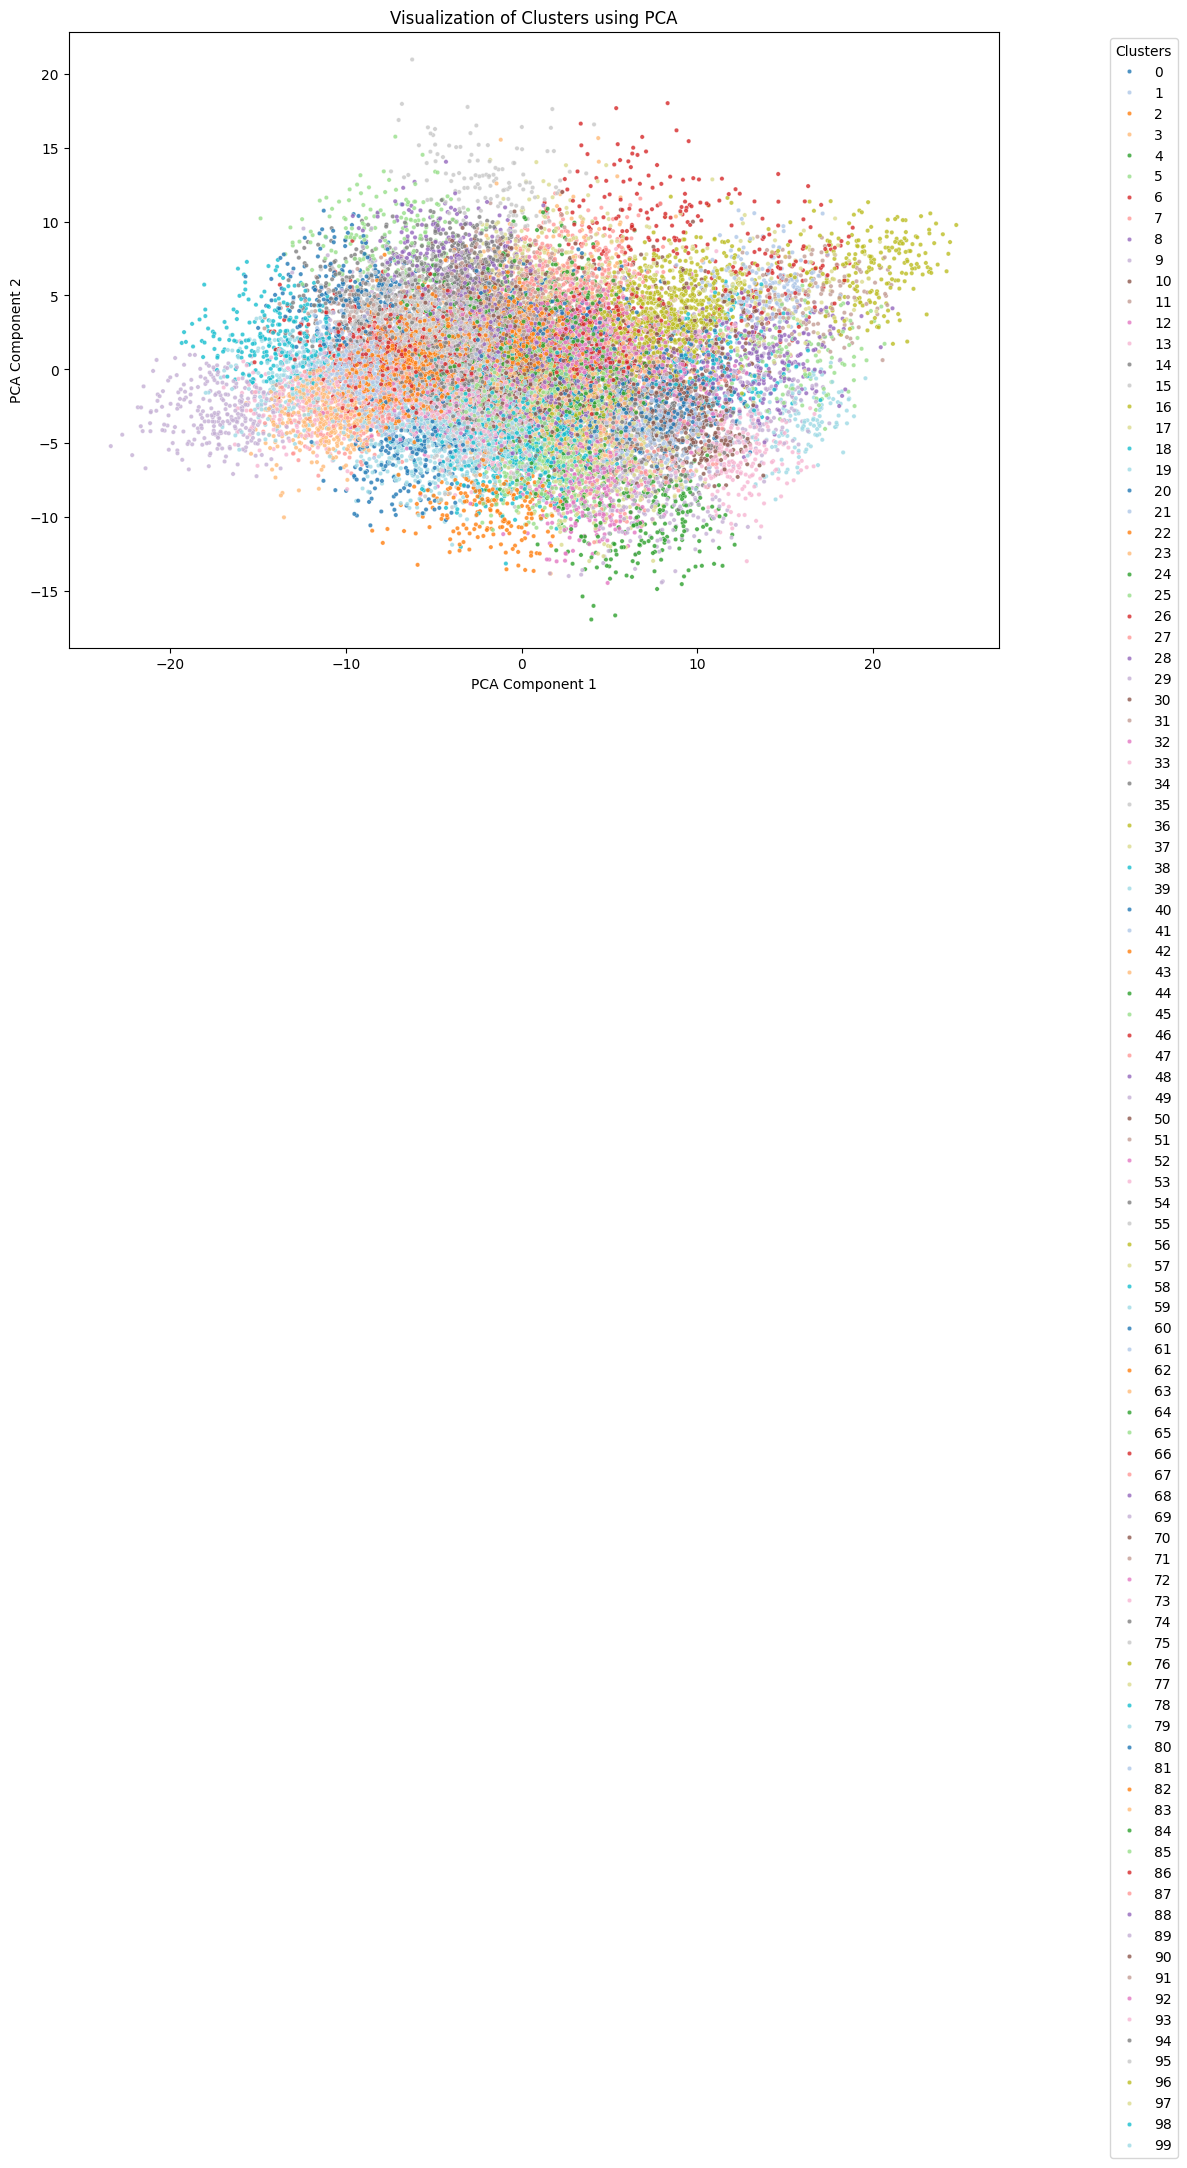

In [ ]:
pca = PCA(n_components=2)
x_aux_pca = pca.fit_transform(x_aux)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_aux_pca[:, 0], y=x_aux_pca[:, 1], hue=kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualization of Clusters using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
# plt.legend(title="Clusters", loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

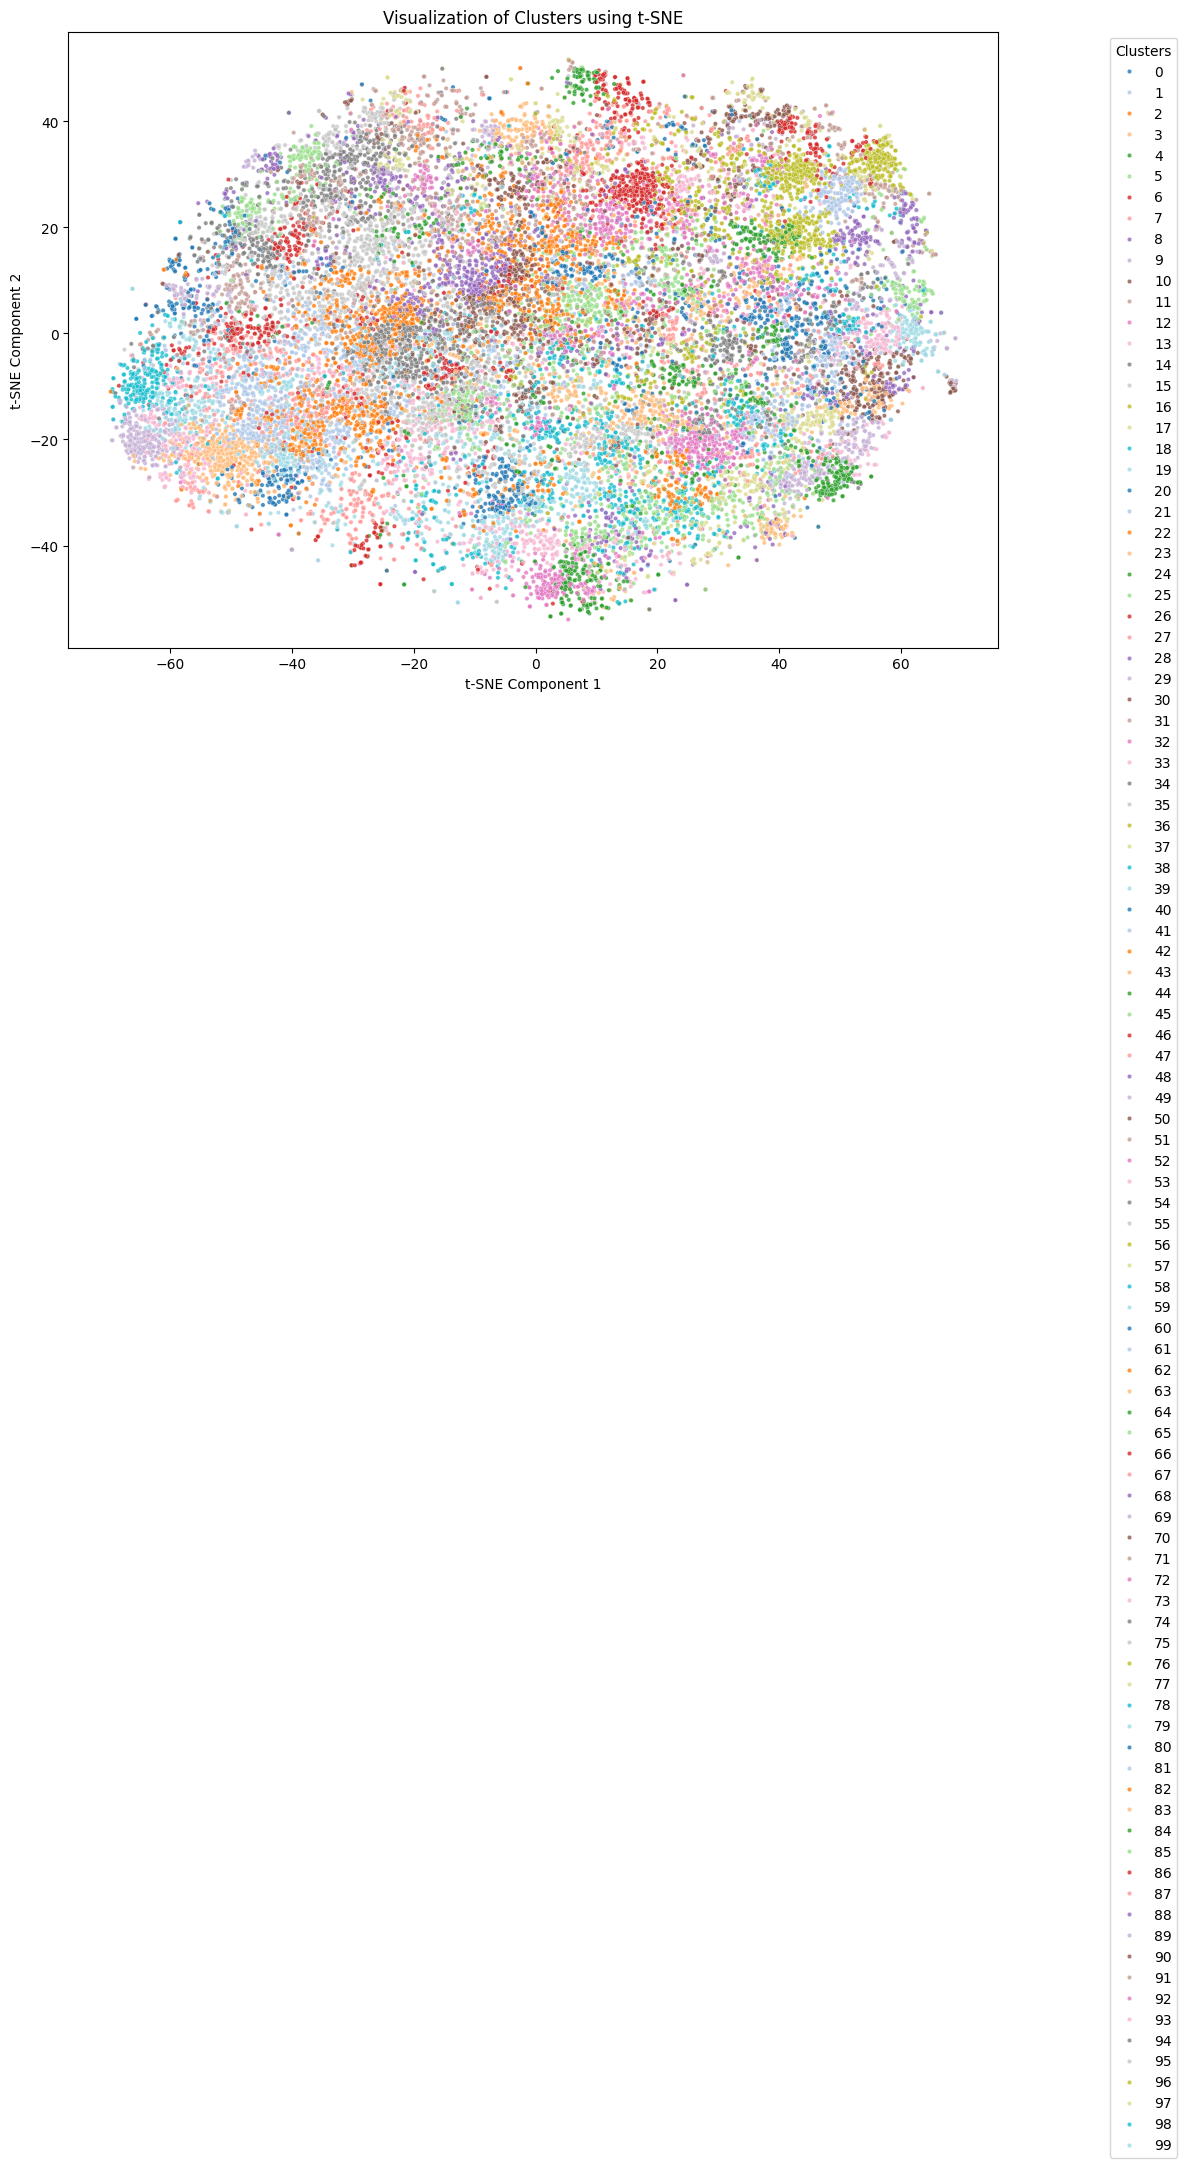

In [ ]:
tsne = TSNE(n_components=2, perplexity=30)
x_aux_tsne = tsne.fit_transform(x_aux)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_aux_tsne[:, 0], y=x_aux_tsne[:, 1], hue=kmeans.labels_, palette='tab20', s=10, alpha=0.8)
plt.title("Visualization of Clusters using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Clusters", loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [ ]:
# try umap
